In [ ]:
from google.colab import files
import pandas as pd
import numpy as np


In [ ]:
uploaded=files.upload()

Saving IDS_ElectricityRecord.csv to IDS_ElectricityRecord.csv


In [ ]:
df=pd.read_csv('IDS_ElectricityRecord.csv')

In [ ]:
df

,Unnamed: 0,month,year,unit_consumed,price,area,season
0,0,march,2021,212,5024,North Karachi,summer
1,1,february,2021,233,4838,North Karachi,winter
2,2,january,2021,260,5450,North Karachi,winter
3,3,december,2020,282,5801,North Karachi,winter
4,4,november,2020,280,5868,North Karachi,winter
...,...,...,...,...,...,...,...
2702,2742,december,2020,102,742,saddar,winter
2703,2743,march,2021,198,1942,saddar,summer
2704,2744,april,2021,251,3706,saddar,summer
2705,2745,july,2021,225,3053,saddar,summer


In [ ]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
df.rename(columns={'april' : 'month','2021':'year','212':'unit_consumed','5024':'price','summer':'season','7.0':'load'},inplace=True)


In [ ]:
df.rename(columns={'North Karachi':'area'},inplace=True)


In [ ]:
df

,month,year,unit_consumed,price,area,season
0,march,2021,212,5024,North Karachi,summer
1,february,2021,233,4838,North Karachi,winter
2,january,2021,260,5450,North Karachi,winter
3,december,2020,282,5801,North Karachi,winter
4,november,2020,280,5868,North Karachi,winter
...,...,...,...,...,...,...
2702,december,2020,102,742,saddar,winter
2703,march,2021,198,1942,saddar,summer
2704,april,2021,251,3706,saddar,summer
2705,july,2021,225,3053,saddar,summer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          2707 non-null   object
 1   year           2707 non-null   int64 
 2   unit_consumed  2707 non-null   int64 
 3   price          2707 non-null   int64 
 4   area           2702 non-null   object
 5   season         2707 non-null   object
dtypes: int64(3), object(3)
memory usage: 127.0+ KB


In [ ]:
df.describe()

,year,unit_consumed,price
count,2707.000000,2707.000000,2707.000000
mean,2019.485039,337.603620,9390.983376
std,1.075519,335.612034,34672.698383
min,2018.000000,0.000000,4.000000
25%,2019.000000,156.000000,1600.000000
50%,2020.000000,260.000000,2991.000000
75%,2020.000000,423.000000,6540.000000
max,2021.000000,7055.000000,344432.000000


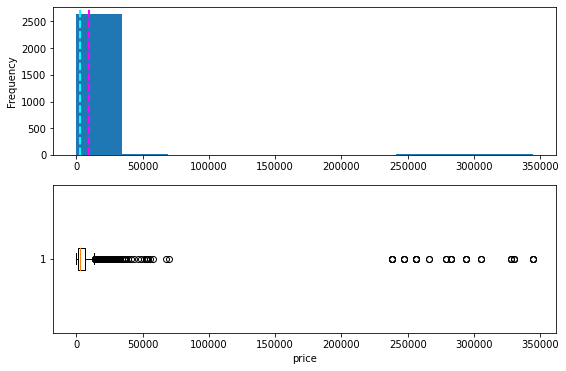

In [ ]:
#Histogram BoxPlot
import matplotlib.pyplot as plt
%matplotlib inline

label=df['price']
fig,ax=plt.subplots(2,1,figsize=(9,6))
ax[0].hist(label,bins=10)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('price')
fig.show()

In [ ]:
numeric_features=[	'year',	'unit_consumed','price']

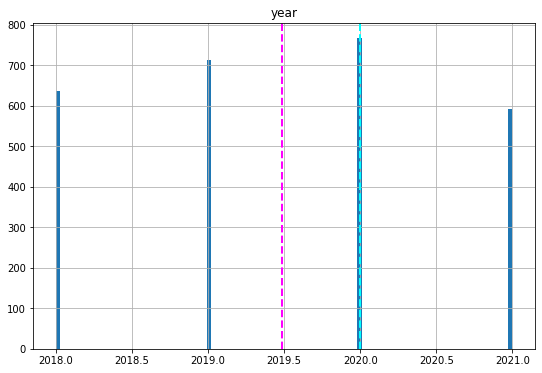

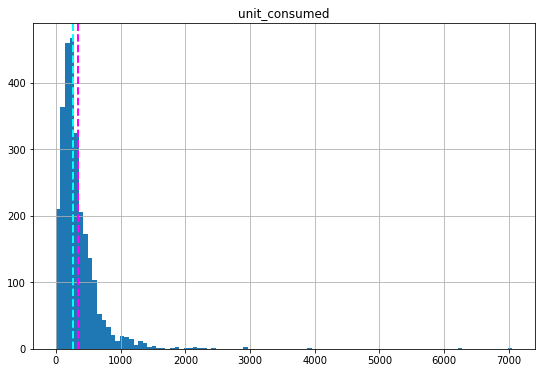

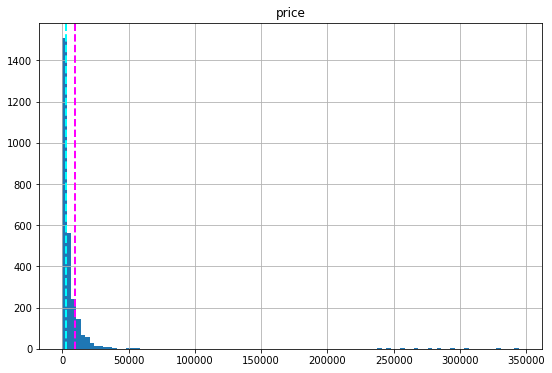

In [ ]:
%matplotlib inline
#histogram
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  features=df[col]
  features.hist(bins=100 , ax=ax)
  ax.axvline(features.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(features.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

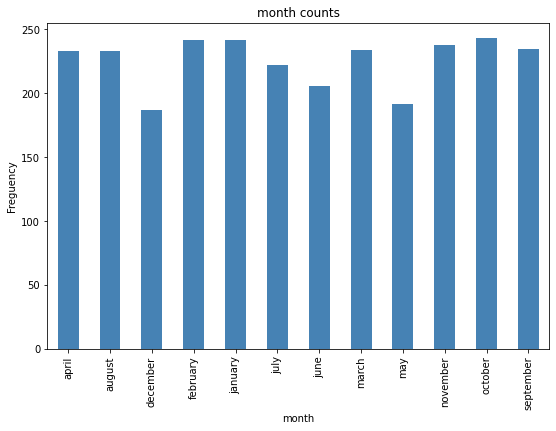

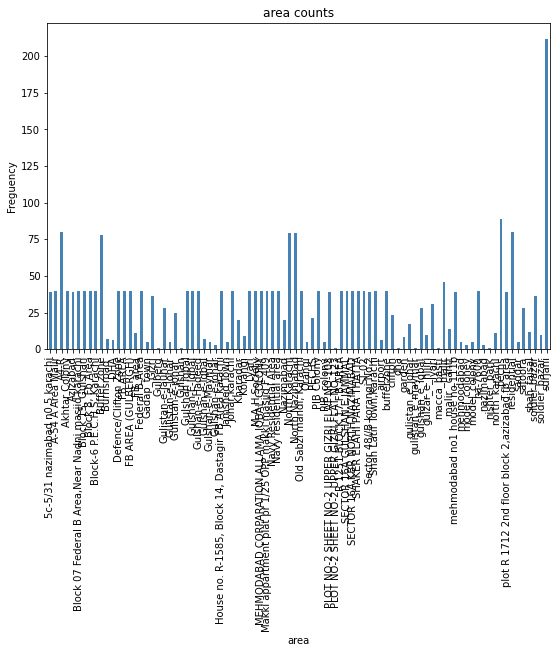

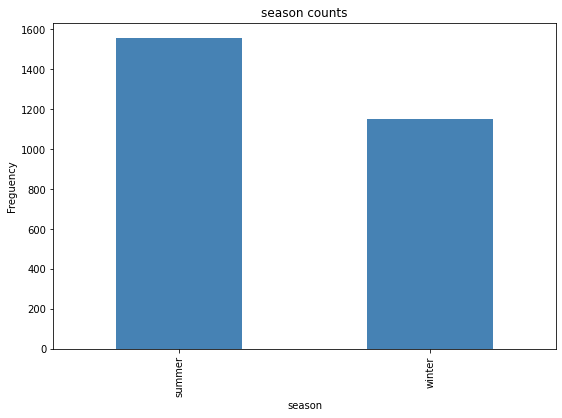

In [ ]:
# bar Chart
categorical_features=['month', 'area', 'season']
for col in categorical_features:
  fig=plt.figure(figsize=(9,6))
  count=df[col].value_counts().sort_index()
  ax=fig.gca()
  count.plot.bar(ax=ax,color='steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Freguency')
plt.show()

In [ ]:
df.corr()

,year,unit_consumed,price
year,1.000000,0.064870,-0.005249
unit_consumed,0.064870,1.000000,0.175769
price,-0.005249,0.175769,1.000000


In [ ]:
numeric_features=[	'year',	'unit_consumed']

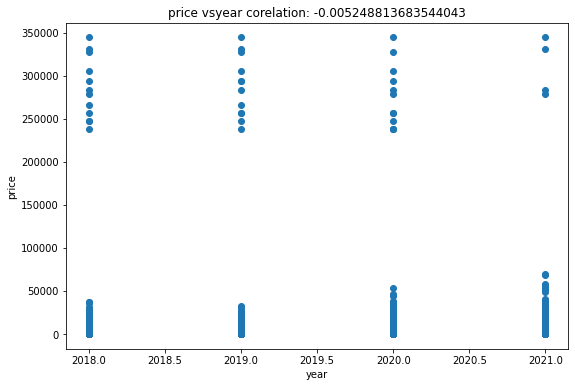

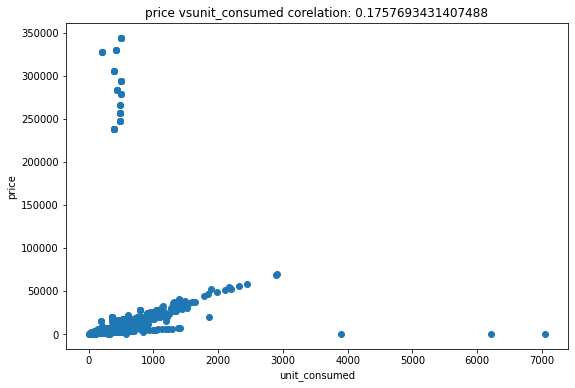

In [ ]:
#Scatter plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  features=df[col]
  label=df['price']
  corelation=features.corr(label)
  plt.scatter(x=features,y=label)
  plt.xlabel(col)
  plt.ylabel('price')
  ax.set_title('price vs' + col + ' corelation: ' + str(corelation) )
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

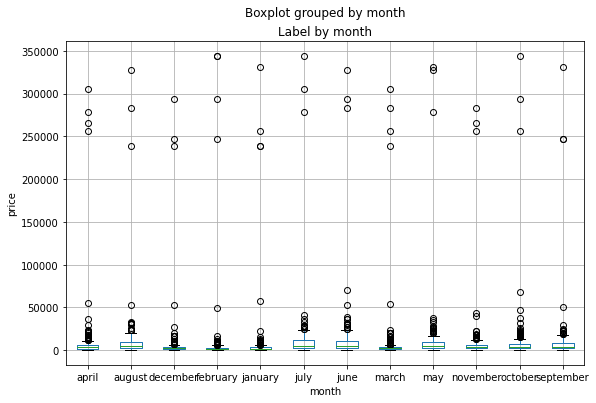

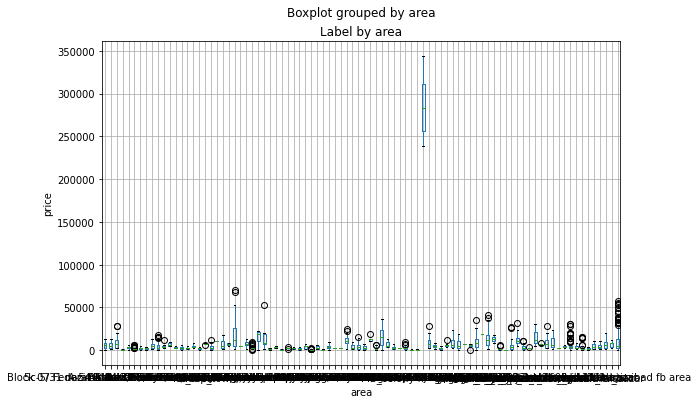

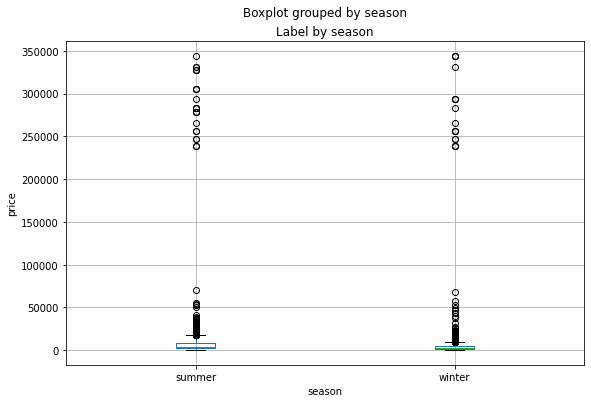

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("price")
plt.show()

In [ ]:
df.drop(['area'],inplace=True,axis=1)

In [ ]:
df

,month,year,unit_consumed,price,season
0,march,2021,212,5024,summer
1,february,2021,233,4838,winter
2,january,2021,260,5450,winter
3,december,2020,282,5801,winter
4,november,2020,280,5868,winter
...,...,...,...,...,...
2702,december,2020,102,742,winter
2703,march,2021,198,1942,summer
2704,april,2021,251,3706,summer
2705,july,2021,225,3053,summer


In [ ]:
df.loc[df['month']=='march' , 'month'] = 3
df.loc[df['month']=='april' , 'month'] = 4
df.loc[df['month']=='may' , 'month'] = 5
df.loc[df['month']=='june' , 'month'] = 6
df.loc[df['month']=='july' , 'month'] = 7
df.loc[df['month']=='august' , 'month'] = 8
df.loc[df['month']=='september' , 'month'] = 9
df.loc[df['month']=='october' , 'month'] = 10
df.loc[df['month']=='november' , 'month'] = 11
df.loc[df['month']=='december' , 'month'] = 12
df.loc[df['month']=='january' , 'month'] = 1
df.loc[df['month']=='february' , 'month'] = 2

In [ ]:
df.loc[:23]

,month,year,unit_consumed,price,season
0,3,2021,212,5024,summer
1,2,2021,233,4838,winter
2,1,2021,260,5450,winter
3,12,2020,282,5801,winter
4,11,2020,280,5868,winter
5,10,2020,376,6944,winter
6,9,2020,439,9120,summer
7,8,2020,494,9376,summer
8,7,2020,388,7889,summer
9,6,2020,418,8767,summer


In [ ]:
df['season']=df['season'].replace({'winter': 1 ,'summer' : 2})

In [ ]:
X, y = df[ ['month', 'year', 'unit_consumed','season']].values, df['price'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[3 2021 212 2]
 [2 2021 233 1]
 [1 2021 260 1]
 [12 2020 282 1]
 [11 2020 280 1]
 [10 2020 376 1]
 [9 2020 439 2]
 [8 2020 494 2]
 [7 2020 388 2]
 [6 2020 418 2]]

Labels:
[5024 4838 5450 5801 5868 6944 9120 9376 7889 8767]


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 2436 rows
Test Set: 271 rows


#LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 6803. 10097.  7305.  8227.  7431. 10194.  8941. 10426. 11294.  4867.]
Actual labels   :  [1298 6449 2240 3560 3990 5377 5915 5585 6880 1540]


In [ ]:
model.score(X_test,y_test)

0.008933549336952673

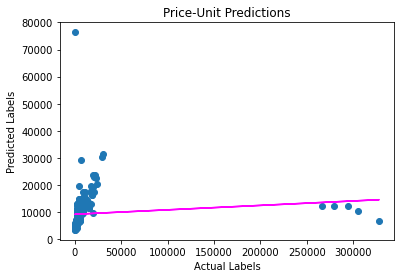

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price-Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# **ERROR**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test,prediction)
print('mse: ', mse)
rmse=np.sqrt(mse)
print('rmse',rmse)

r2=r2_score(y_test,prediction)
print('R2',r2)


mse:  1538124954.642372
rmse 39218.936174281574
R2 0.008933549336952673


# **LASSO**

Lasso() 

MSE: 1538111865.27771
RMSE: 39218.76929835649
R2: 0.00894198326173734


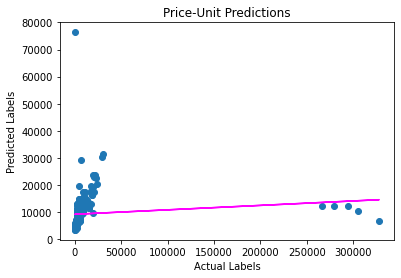

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print (model, "\n")

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)

plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price-Unit Predictions')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 6799. 10099.  7303.  8228.  7431. 10195.  8944. 10426. 11292.  4867.]
Actual labels   :  [1298 6449 2240 3560 3990 5377 5915 5585 6880 1540]


# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 385.50
|   |--- feature_2 <= 209.50
|   |   |--- feature_2 <= 120.50
|   |   |   |--- feature_2 <= 80.50
|   |   |   |   |--- feature_2 <= 46.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 2018.50
|   |   |   |   |   |   |   |--- feature_2 <= 45.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 44.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 42.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 40.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [310.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  40.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [330.00]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  42.00
|   |   |   |   |   |   |   |   |   |   |--- value: [409.00]
|   |   |   |   |   |   |   |   |--- feature_2 >  44.00
|   |   |   |   |   |   |   |   |   |--- value: [239.00]
|   |   |   |   |   |   |   |--- feature_2 >  45.50
|   | 

MSE: 1866851505.4936256
RMSE: 43207.07703019988
R2: -0.20287619668371892


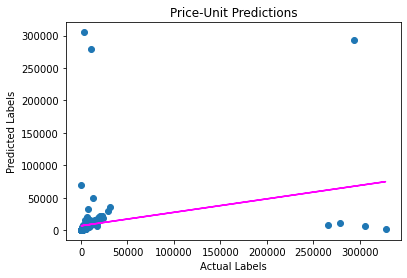

In [ ]:

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)

plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price-Unit Predictions')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:5])
print('Actual labels   : ' ,y_test[:5])

Predicted labels:  [1268. 6184. 2272. 3560. 2890.]
Actual labels   :  [1298 6449 2240 3560 3990]


In [ ]:
model.score(X_test,y_test)

-0.20287619668371892

# Random Forest Model

RandomForestRegressor() 

MSE: 1866851505.4936256
RMSE: 43207.07703019988
R2: -0.20287619668371892


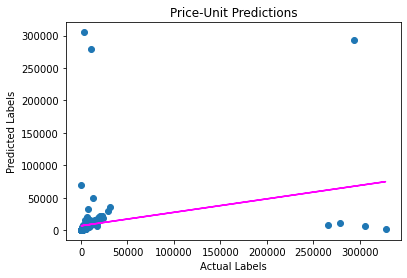

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)

plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price-Unit Predictions')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 1311. 10284.  2413.  3538.  2617.  4730.  5699.  8463.  8867.  1143.]
Actual labels   :  [1298 6449 2240 3560 3990 5377 5915 5585 6880 1540]


In [ ]:
model.score(X_test,y_test)

0.1462062382464101

GradientBoostingRegressor() 

MSE: 1325079151.0423849
RMSE: 36401.63665334822
R2: 0.1462062382464101


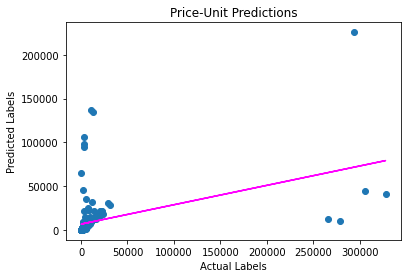

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)


plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price-Unit Predictions')

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 1469. 10557.  3313.  2918.  2661.  7844.  5119.  8094. 13848.  1505.]
Actual labels   :  [1298 6449 2240 3560 3990 5377 5915 5585 6880 1540]


In [ ]:
model.score(X_test,y_test)

0.3541317555739829

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


model=gridsearch.best_estimator_
print(model, "\n")

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)




Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 1002380883.2375365
RMSE: 31660.399290557543
R2: 0.3541317555739829


In [ ]:

prediction = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 1469. 10557.  3313.  2918.  2661.  7844.  5119.  8094. 13848.  1505.]
Actual labels   :  [1298 6449 2240 3560 3990 5377 5915 5585 6880 1540]


In [ ]:
model.score(X_test,y_test)

0.3541317555739829

In [ ]:
model.predict([[5,2021,230,2]])


array([5054.25813428])